In [3]:
#%cd C:\Users\bahaa\Planck-Mass-MC-Master\planck-mass-MC-master\Documentation\Examples\Animated Plotting Example

from planckmc.track_generation import halo_model
from planckmc.track_generation import make_tracks
from planckmc.detector_characteristics import DETECTOR_CHARACTERISTICS
from planckmc.response import sensor_response, RESPONSE_DICT
from planckmc.config import CONFIG
import numpy as np
from numba import njit, jit
#%matplotlib widget
import matplotlib # plotting libraries
from matplotlib import animation, rc, cm
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import LightSource
from tqdm import tqdm
#from matplotlib import interactive
#interactive(True)
import matplotlib.image as NonUniformImage
from multihist import Histdd
import numericalunits as nu
from scipy.stats import gaussian_kde
from random import randrange, uniform


In [4]:
vel = halo_model.generate_vel_array(n_vels=1)

In [5]:
entry_vecs, exit_vecs, t_entry, t_exit = make_tracks.generate_tracks(vel, np.zeros(vel.shape))

In [6]:
out = make_tracks.generate_acceleration_dict(entry_vecs, exit_vecs, t_entry, t_exit, {'M':2.18e-17, 'G':6.674e-11},)

In [7]:
out[0]['time']

array([ -500,  -400,  -300,  -200,  -100,     0,   100,   200,   300,
         400,   500,   600,   700,   800,   900,  1000,  1100,  1200,
        1300,  1400,  1500,  1600,  1700,  1800,  1900,  2000,  2100,
        2200,  2300,  2400,  2500,  2600,  2700,  2800,  2900,  3000,
        3100,  3200,  3300,  3400,  3500,  3600,  3700,  3800,  3900,
        4000,  4100,  4200,  4300,  4400,  4500,  4600,  4700,  4800,
        4900,  5000,  5100,  5200,  5300,  5400,  5500,  5600,  5700,
        5800,  5900,  6000,  6100,  6200,  6300,  6400,  6500,  6600,
        6700,  6800,  6900,  7000,  7100,  7200,  7300,  7400,  7500,
        7600,  7700,  7800,  7900,  8000,  8100,  8200,  8300,  8400,
        8500,  8600,  8700,  8800,  8900,  9000,  9100,  9200,  9300,
        9400,  9500,  9600,  9700,  9800,  9900, 10000, 10100, 10200,
       10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100,
       11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000,
       12100, 12200,

In [8]:
out[0]['particle_location']

array([[ 4.9839516 ,  1.12275829, -1.48347076],
       [ 4.95886058,  1.14117823, -1.4667146 ],
       [ 4.93376956,  1.15959816, -1.44995844],
       [ 4.90867853,  1.1780181 , -1.43320228],
       [ 4.88358751,  1.19643804, -1.41644612],
       [ 4.85849649,  1.21485798, -1.39968995],
       [ 4.83340547,  1.23327792, -1.38293379],
       [ 4.80831444,  1.25169786, -1.36617763],
       [ 4.78322342,  1.2701178 , -1.34942147],
       [ 4.7581324 ,  1.28853773, -1.33266531],
       [ 4.73304137,  1.30695767, -1.31590915],
       [ 4.70795035,  1.32537761, -1.29915298],
       [ 4.68285933,  1.34379755, -1.28239682],
       [ 4.65776831,  1.36221749, -1.26564066],
       [ 4.63267728,  1.38063743, -1.2488845 ],
       [ 4.60758626,  1.39905736, -1.23212834],
       [ 4.58249524,  1.4174773 , -1.21537218],
       [ 4.55740422,  1.43589724, -1.19861602],
       [ 4.53231319,  1.45431718, -1.18185985],
       [ 4.50722217,  1.47273712, -1.16510369],
       [ 4.48213115,  1.49115706, -1.148

In [9]:
sensors = tuple(DETECTOR_CHARACTERISTICS.keys())
out[0][sensors[0]]

array([[1.53506163e-29, 7.92676153e-30, 2.91580655e-30],
       [1.53569054e-29, 7.99055113e-30, 2.95852888e-30],
       [1.53624775e-29, 8.05439747e-30, 3.00140791e-30],
       [1.53673266e-29, 8.11829287e-30, 3.04443936e-30],
       [1.53714465e-29, 8.18222958e-30, 3.08761890e-30],
       [1.53748316e-29, 8.24619972e-30, 3.13094209e-30],
       [1.53774760e-29, 8.31019536e-30, 3.17440441e-30],
       [1.53793743e-29, 8.37420842e-30, 3.21800126e-30],
       [1.53805208e-29, 8.43823079e-30, 3.26172795e-30],
       [1.53809103e-29, 8.50225424e-30, 3.30557974e-30],
       [1.53805374e-29, 8.56627044e-30, 3.34955177e-30],
       [1.53793972e-29, 8.63027101e-30, 3.39363913e-30],
       [1.53774847e-29, 8.69424747e-30, 3.43783680e-30],
       [1.53747950e-29, 8.75819126e-30, 3.48213972e-30],
       [1.53713234e-29, 8.82209374e-30, 3.52654274e-30],
       [1.53670654e-29, 8.88594621e-30, 3.57104061e-30],
       [1.53620167e-29, 8.94973987e-30, 3.61562804e-30],
       [1.53561729e-29, 9.01346

In [10]:
sensor_response(sensors[0], out[0][sensors[0]])

array([[32754, 33059, 33311],
       [33184, 31545, 32160],
       [31999, 34264, 34312],
       [32968, 34058, 32025],
       [32554, 32905, 32352],
       [32624, 32679, 32712],
       [31896, 33783, 32625],
       [32881, 32311, 33609],
       [32471, 33133, 31687],
       [32735, 31576, 32826],
       [32636, 32363, 32337],
       [32554, 32895, 33019],
       [32613, 32451, 32155],
       [32891, 32230, 31846],
       [34305, 32013, 33471],
       [33420, 33474, 33175],
       [31908, 32435, 33322],
       [32838, 32204, 32239],
       [32227, 34108, 33488],
       [33039, 32920, 33036],
       [32890, 32974, 32600],
       [33310, 33274, 32925],
       [33498, 32349, 32146],
       [32869, 32396, 32990],
       [32456, 32713, 31864],
       [33017, 33286, 32615],
       [33496, 32214, 32899],
       [32237, 32585, 33068],
       [33482, 32720, 33257],
       [32407, 32731, 32914],
       [33103, 33565, 32240],
       [33518, 33196, 31178],
       [33442, 32285, 32755],
       [32

In [11]:
len(out[0])

66

In [166]:
DETECTOR_CHARACTERISTICS

{'376011': {'position': array([-3, -3, -3]),
  'orientation': array([[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]]),
  'sensitivity': array([1, 1, 1]),
  'noise': array([0.02, 0.02, 0.02])},
 '7D0B2D': {'position': array([-3, -3, -1]),
  'orientation': array([[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]]),
  'sensitivity': array([1, 1, 1]),
  'noise': array([0.02, 0.02, 0.02])},
 'FB4128': {'position': array([-3, -3,  1]),
  'orientation': array([[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]]),
  'sensitivity': array([1, 1, 1]),
  'noise': array([0.02, 0.02, 0.02])},
 '8B0AE2': {'position': array([-3, -3,  3]),
  'orientation': array([[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]]),
  'sensitivity': array([1, 1, 1]),
  'noise': array([0.02, 0.02, 0.02])},
 'A4AA10': {'position': array([-1, -3, -3]),
  'orientation': array([[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]]),
  'sensitivity': array([1, 1, 1]),
  'noise': array([0.02, 0.02, 0.02])},
 '2AB43E': {'positio

In [11]:
track = 1
reading_vals = []
tm_vals = []
for sensrs in range(0,len(sensors)):
    x = sensor_response(sensors[sensrs], out[track-1][sensors[sensrs]])
    for tms in range(0,len(out[track-1]['time'])):
        reading_vals.append(max(x[tms]))
        tm_vals.append(out[track-1]['time'][tms])

In [80]:
#max(x[0]) instead of np.linalg.norm(x[0])

In [ ]:
plt.figure(figsize=[12,8])
m2 = Histdd(tm_vals, reading_vals, bins=[200,200]) #[np.logspace(0.5,4.7,200),np.linspace(-0.02,1.02,200)])
m2.plot(cblabel = 'Count', log_scale = False, cmap = 'viridis')
#plt.hist2d(df['S2'],df['aft'], bins=[np.logspace(1,4.5,200),200], norm=clr.LogNorm())
#plt.plot(df['S2'],df['aft'],'.')
#plt.xlim(-55,55)
#plt.ylim(100,0)
#plt.title()
#plt.yscale('log')
plt.xscale('log')
plt.ylabel('sensor_readings')
plt.xlabel('time')
plt.show()

In [12]:
track = 1
reading_vals = []
tm_vals = []
for sensrs in range(0,len(sensors)):
    x = sensor_response(sensors[sensrs], out[track-1][sensors[sensrs]])
    for tms in range(0,len(out[track-1]['time'])):
        for dim in range(0,len(x[tms])):
            reading_vals.append((x[tms][dim]))
            tm_vals.append(out[track-1]['time'][tms])

In [13]:
smaller_list = []
for zfs in range(0,len(reading_vals)):
    if reading_vals[zfs] < (65536/2)-1:
        smaller_list.append(reading_vals[zfs])

print(len(smaller_list)*100/len(reading_vals))

49.63191105769231


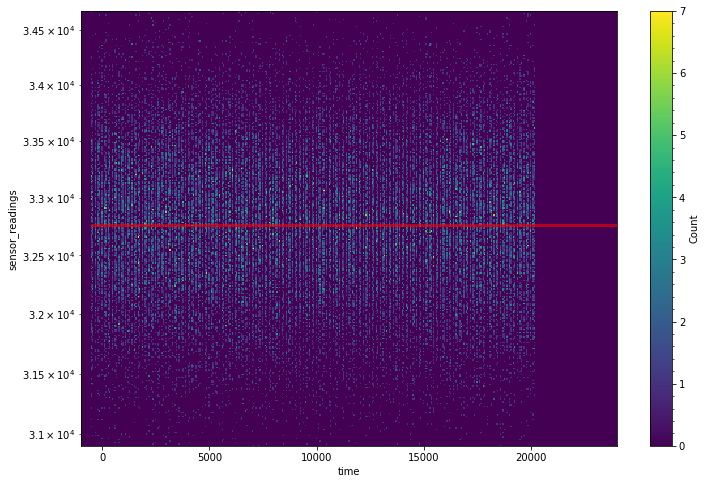

In [16]:
X_Val1 = [-5e2,3.7e4]
Y_Val1 = [(65536/2)-1, (65536/2)-1]

# ADC readout through time, showing how the noise completely overtakes the data

plt.figure(figsize=[12,8])
m2 = Histdd(tm_vals, reading_vals, bins=[np.linspace(-1e3,2.4e4,411),np.logspace(4.49,4.54,301)])
m2.plot(cblabel = 'Count', log_scale = False, cmap = 'viridis')
#plt.hist2d(df['S2'],df['aft'], bins=[np.logspace(1,4.5,200),200], norm=clr.LogNorm())
#plt.plot(df['S2'],df['aft'],'.')
#plt.xlim(-55,55)
#plt.ylim(100,0)
#plt.title()
plt.yscale('log')
plt.plot(X_Val1, Y_Val1, 'r', alpha=0.6, linewidth = 3)
#plt.xscale('log')
plt.ylabel('sensor_readings')
plt.xlabel('time')
plt.show()

In [17]:
track = 1
accls_vals = []
tm_vals = []
for sensrs in range(0,len(sensors)):
    x = out[track-1][sensors[sensrs]]
    for tms in range(0,len(out[track-1]['time'])):
        for dim in range(0,len(x[tms])):
            accls_vals.append((x[tms][dim]))
            tm_vals.append(out[track-1]['time'][tms] + 50)

In [18]:
track = 1
accls_vals_sensr = []
tm_vals_sensr = []
sensrs = 22

x_sensr = out[track-1][sensors[sensrs]]
for tms in range(0,len(out[track-1]['time'])):
    for dim in range(0,len(x_sensr[tms])):
        accls_vals_sensr.append((x_sensr[tms][dim]))
        tm_vals_sensr.append(out[track-1]['time'][tms] + 50)

In [19]:
track = 1
accls_vals_sensr_dimX = []
accls_vals_sensr_dimY = []
accls_vals_sensr_dimZ = []
tm_vals_sensr_dimX = []
tm_vals_sensr_dimY = []
tm_vals_sensr_dimZ = []
sensrs_dims = 22

x_sensr_dims = out[track-1][sensors[sensrs_dims]]
for tms in range(0,len(out[track-1]['time'])):
    for dim in range(0,len(x_sensr_dims[tms])):
        accls_vals_sensr_dimX.append((x_sensr_dims[tms][0]))
        accls_vals_sensr_dimY.append((x_sensr_dims[tms][1]))
        accls_vals_sensr_dimZ.append((x_sensr_dims[tms][2]))
        tm_vals_sensr_dimX.append(out[track-1]['time'][tms] + 50)
        tm_vals_sensr_dimY.append(out[track-1]['time'][tms] + 50)
        tm_vals_sensr_dimZ.append(out[track-1]['time'][tms] + 50)

In [20]:
totl_sensr_accel = []
tm_vals_sensr_totl = []
for tms in range(0,len(out[track-1]['time'])):
    totl_sensr_accel.append(x_sensr_dims[tms][0] + x_sensr_dims[tms][1] + x_sensr_dims[tms][2])
    tm_vals_sensr_totl.append(out[track-1]['time'][tms] + 50)

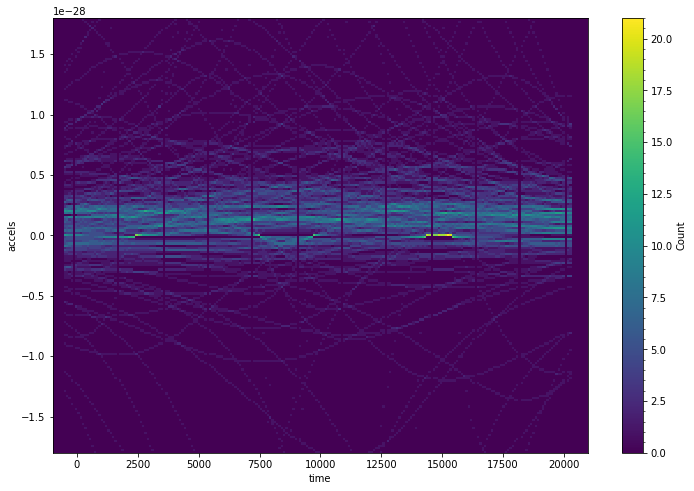

In [47]:
#X_Val1 = [-50000, 70000]
#Y_Val1 = [32000, 32000]

# All sensors, All Dimensions

plt.figure(figsize=[12,8])
#if end point in x bins is 45000, then bins should be 461: (45 + 1)*10 + 1, does not continue on to the hundreds unit (if start is -1000)
#UPDATE- take this: abs(max/min) will give a number, add one, multiply by ten, add one, e.g. 150000/10000 = 15, 15+1= 16, 16*10=160, 160+1=161=bins
m2 = Histdd(tm_vals, accls_vals, bins=[np.linspace(-1000,21000,233),np.linspace(-1.8e-28,1.8e-28,201)])
m2.plot(cblabel = 'Count', log_scale = False, cmap = 'viridis')
#plt.hist2d(df['S2'],df['aft'], bins=[np.logspace(1,4.5,200),200], norm=clr.LogNorm())
#plt.plot(df['S2'],df['aft'],'.')
#plt.xlim(-55,55)
#plt.ylim(100,0)
#plt.title()
#plt.yscale('log')
#plt.plot(X_Val1, Y_Val1, 'r', alpha=0.6, linewidth = 3)
#plt.xscale('log')
plt.ylabel('accels')
plt.xlabel('time')
plt.show()

In [181]:
np.linspace(-80000,80000,201)

array([-80000., -79200., -78400., -77600., -76800., -76000., -75200.,
       -74400., -73600., -72800., -72000., -71200., -70400., -69600.,
       -68800., -68000., -67200., -66400., -65600., -64800., -64000.,
       -63200., -62400., -61600., -60800., -60000., -59200., -58400.,
       -57600., -56800., -56000., -55200., -54400., -53600., -52800.,
       -52000., -51200., -50400., -49600., -48800., -48000., -47200.,
       -46400., -45600., -44800., -44000., -43200., -42400., -41600.,
       -40800., -40000., -39200., -38400., -37600., -36800., -36000.,
       -35200., -34400., -33600., -32800., -32000., -31200., -30400.,
       -29600., -28800., -28000., -27200., -26400., -25600., -24800.,
       -24000., -23200., -22400., -21600., -20800., -20000., -19200.,
       -18400., -17600., -16800., -16000., -15200., -14400., -13600.,
       -12800., -12000., -11200., -10400.,  -9600.,  -8800.,  -8000.,
        -7200.,  -6400.,  -5600.,  -4800.,  -4000.,  -3200.,  -2400.,
        -1600.,   -8

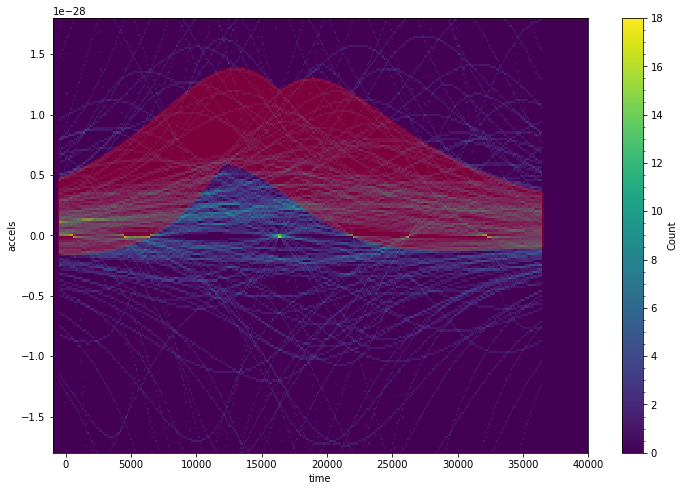

In [182]:
#X_Val1 = [-50000, 70000]
#Y_Val1 = [32000, 32000]

# All sensors, All Dimensions with overlayed single sensor histogram/area of accelerations in all dimensions

plt.figure(figsize=[12,8])
m2 = Histdd(tm_vals, accls_vals, bins=[np.linspace(-1000,40000,411),np.linspace(-1.8e-28,1.8e-28,201)])
plt.plot(tm_vals_sensr, accls_vals_sensr, 'r', alpha=0.3, linewidth = 3)
m2.plot(cblabel = 'Count', log_scale = False, cmap = 'viridis')
#plt.hist2d(df['S2'],df['aft'], bins=[np.logspace(1,4.5,200),200], norm=clr.LogNorm())
#plt.plot(df['S2'],df['aft'],'.')
#plt.xlim(-55,55)
#plt.ylim(100,0)
#plt.title()
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel('accels')
plt.xlabel('time')
plt.show()

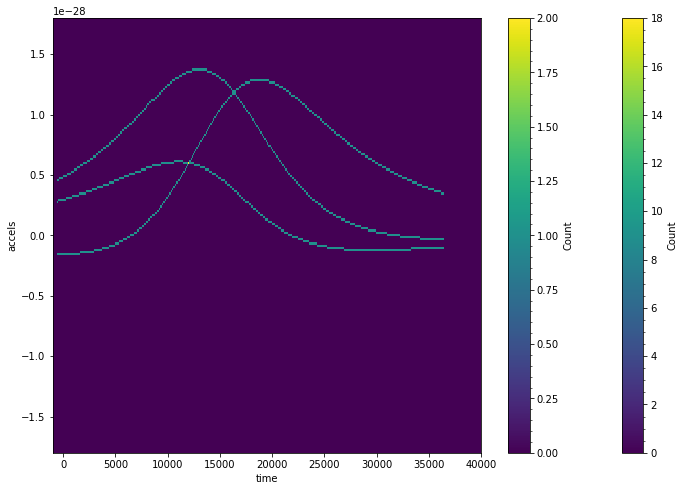

In [183]:
#X_Val1 = [-50000, 70000]
#Y_Val1 = [32000, 32000]

# Single Sensor accelerations split into component dimensions

plt.figure(figsize=[12,8])
m2 = Histdd(tm_vals, accls_vals, bins=[np.linspace(-1000,40000,411),np.linspace(-1.8e-28,1.8e-28,201)])
m3 = Histdd(tm_vals_sensr, accls_vals_sensr, bins=[np.linspace(-1000,40000,411),np.linspace(-1.8e-28,1.8e-28,201)])
m2.plot(cblabel = 'Count', log_scale = False, cmap = 'viridis')
m3.plot(cblabel = 'Count', log_scale = False, cmap = 'viridis')
#plt.hist2d(df['S2'],df['aft'], bins=[np.logspace(1,4.5,200),200], norm=clr.LogNorm())
#plt.plot(df['S2'],df['aft'],'.')
#plt.xlim(-55,55)
#plt.ylim(100,0)
#plt.title()
#plt.yscale('log')
#plt.plot(X_Val1, Y_Val1, 'r', alpha=0.6, linewidth = 3)
#plt.xscale('log')
plt.ylabel('accels')
plt.xlabel('time')
plt.show()

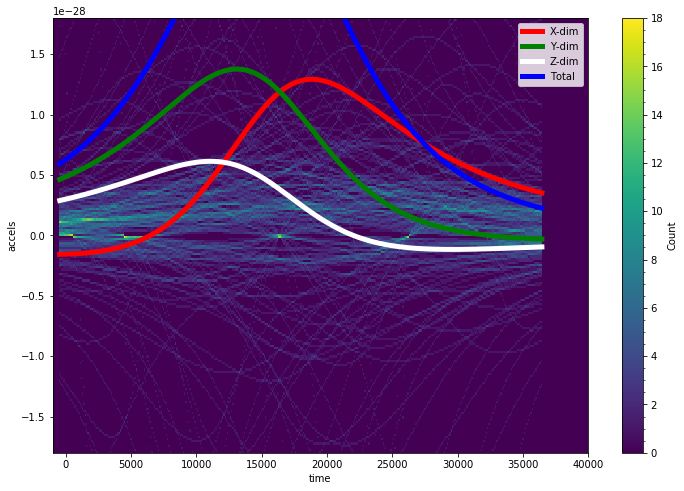

In [184]:
#X_Val1 = [-50000, 70000]
#Y_Val1 = [32000, 32000]

# All sensors, All Dimensions overlayed with single senser accelerations in all dimensions and the added total acceleration of the sensor

plt.figure(figsize=[12,8])
m2 = Histdd(tm_vals, accls_vals, bins=[np.linspace(-1000,40000,411),np.linspace(-1.8e-28,1.8e-28,201)])
#m3 = Histdd(tm_vals_sensr_dimX, accls_vals_sensr_dimX, bins=[np.linspace(-1000,30000,200),np.linspace(-55e-30,50e-30,200)])
m2.plot(cblabel = 'Count', log_scale = False, cmap = 'viridis')
#m3.plot(cblabel = 'Count', log_scale = False, cmap = 'viridis')
#plt.hist2d(df['S2'],df['aft'], bins=[np.logspace(1,4.5,200),200], norm=clr.LogNorm())
#plt.plot(df['S2'],df['aft'],'.')
#plt.xlim(-55,55)
#plt.ylim(100,0)
#plt.title()
#plt.yscale('log')
plt.plot(tm_vals_sensr_dimX, accls_vals_sensr_dimX, 'r', alpha=1, linewidth = 5, label='X-dim')
plt.plot(tm_vals_sensr_dimY, accls_vals_sensr_dimY, 'g', alpha=1, linewidth = 5, label='Y-dim')
plt.plot(tm_vals_sensr_dimZ, accls_vals_sensr_dimZ, 'w', alpha=1, linewidth = 5, label='Z-dim')
plt.plot(tm_vals_sensr_totl, totl_sensr_accel, 'b', alpha=1, linewidth = 5, label='Total')
#plt.xscale('log')
plt.ylabel('accels')
plt.xlabel('time')
plt.legend()
plt.show()

In [185]:
track = 1
accls_vals_1dim = []
tm_vals_1dim = []
for sensrs in range(0,len(sensors)):
    x_1dim = out[track-1][sensors[sensrs]]
    for tms in range(0,len(out[track-1]['time'])):
        accls_vals_1dim.append((x_1dim[tms][0]))
        tm_vals_1dim.append(out[track-1]['time'][tms] + 50)

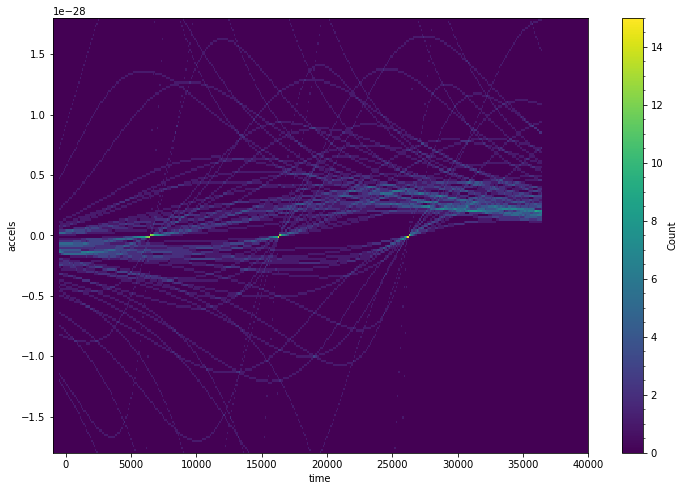

In [186]:
#X_Val1 = [-50000, 70000]
#Y_Val1 = [32000, 32000]

# All sensors, X dimension

plt.figure(figsize=[12,8])
#if end point in x bins is 45000, then bins should be 461: (45 + 1)*10 + 1, does not continue on to the hundreds unit
m2 = Histdd(tm_vals_1dim, accls_vals_1dim, bins=[np.linspace(-1000,40000,411),np.linspace(-1.8e-28,1.8e-28,201)])
m2.plot(cblabel = 'Count', log_scale = False, cmap = 'viridis')
#plt.hist2d(df['S2'],df['aft'], bins=[np.logspace(1,4.5,200),200], norm=clr.LogNorm())
#plt.plot(df['S2'],df['aft'],'.')
#plt.xlim(-55,55)
#plt.ylim(100,0)
#plt.title()
#plt.yscale('log')
#plt.plot(X_Val1, Y_Val1, 'r', alpha=0.6, linewidth = 3)
#plt.xscale('log')
plt.ylabel('accels')
plt.xlabel('time')
plt.show()

In [187]:
track = 1
accls_vals_1dim = []
tm_vals_1dim = []
for sensrs in range(0,len(sensors)):
    x_1dim = out[track-1][sensors[sensrs]]
    for tms in range(0,len(out[track-1]['time'])):
        accls_vals_1dim.append((x_1dim[tms][1]))
        tm_vals_1dim.append(out[track-1]['time'][tms] + 50)

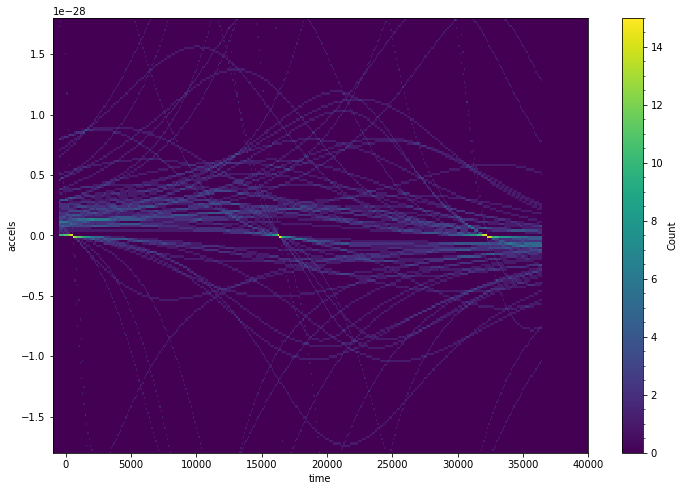

In [188]:
#X_Val1 = [-50000, 70000]
#Y_Val1 = [32000, 32000]

# All sensors, Y dimension

plt.figure(figsize=[12,8])
#if end point in x bins is 45000, then bins should be 461: (45 + 1)*10 + 1, does not continue on to the hundreds unit
m2 = Histdd(tm_vals_1dim, accls_vals_1dim, bins=[np.linspace(-1000,40000,411),np.linspace(-1.8e-28,1.8e-28,201)])
m2.plot(cblabel = 'Count', log_scale = False, cmap = 'viridis')
#plt.hist2d(df['S2'],df['aft'], bins=[np.logspace(1,4.5,200),200], norm=clr.LogNorm())
#plt.plot(df['S2'],df['aft'],'.')
#plt.xlim(-55,55)
#plt.ylim(100,0)
#plt.title()
#plt.yscale('log')
#plt.plot(X_Val1, Y_Val1, 'r', alpha=0.6, linewidth = 3)
#plt.xscale('log')
plt.ylabel('accels')
plt.xlabel('time')
plt.show()

In [189]:
track = 1
accls_vals_1dim = []
tm_vals_1dim = []
for sensrs in range(0,len(sensors)):
    x_1dim = out[track-1][sensors[sensrs]]
    for tms in range(0,len(out[track-1]['time'])):
        accls_vals_1dim.append((x_1dim[tms][2]))
        tm_vals_1dim.append(out[track-1]['time'][tms] + 50)

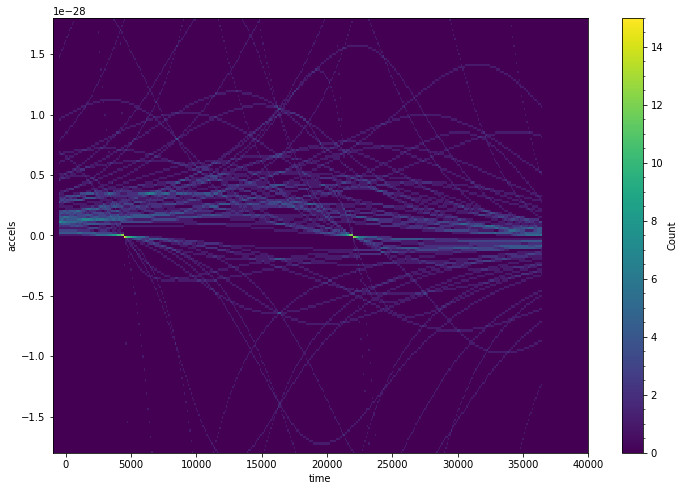

In [190]:
#X_Val1 = [-50000, 70000]
#Y_Val1 = [32000, 32000]

# All sensors, Z dimension

plt.figure(figsize=[12,8])
#if end point in x bins is 45000, then bins should be 461: (45 + 1)*10 + 1, does not continue on to the hundreds unit
m2 = Histdd(tm_vals_1dim, accls_vals_1dim, bins=[np.linspace(-1000,40000,411),np.linspace(-1.8e-28,1.8e-28,201)])
m2.plot(cblabel = 'Count', log_scale = False, cmap = 'viridis')
#plt.hist2d(df['S2'],df['aft'], bins=[np.logspace(1,4.5,200),200], norm=clr.LogNorm())
#plt.plot(df['S2'],df['aft'],'.')
#plt.xlim(-55,55)
#plt.ylim(100,0)
#plt.title()
#plt.yscale('log')
#plt.plot(X_Val1, Y_Val1, 'r', alpha=0.6, linewidth = 3)
#plt.xscale('log')
plt.ylabel('accels')
plt.xlabel('time')
plt.show()

In [ ]:
#X_Val1 = [-50000, 70000]
#Y_Val1 = [32000, 32000]

# Logged plot (incomplete because negative portion is missing; would be solved if normal is taken)

plt.figure(figsize=[12,8])
m2 = Histdd(tm_vals, accls_vals, bins=[np.linspace(-5000,70000,376),np.logspace(-31.5,-26.5,201)])
plt.plot(tm_vals_sensr, accls_vals_sensr, 'r', alpha=0.4, linewidth = 3)
m2.plot(cblabel = 'Count', log_scale = False, cmap = 'viridis')
#plt.hist2d(df['S2'],df['aft'], bins=[np.logspace(1,4.5,200),200], norm=clr.LogNorm())
#plt.plot(df['S2'],df['aft'],'.')
#plt.xlim(-55,55)
#plt.ylim(100,0)
#plt.title()
plt.yscale('log')
#plt.plot(X_Val1, Y_Val1, 'r', alpha=0.6, linewidth = 3)
plt.plot(tm_vals_sensr_dimX, accls_vals_sensr_dimX, 'r', alpha=1, linewidth = 5, label='X-dim')
plt.plot(tm_vals_sensr_dimY, accls_vals_sensr_dimY, 'g', alpha=1, linewidth = 5, label='Y-dim')
plt.plot(tm_vals_sensr_dimZ, accls_vals_sensr_dimZ, 'w', alpha=1, linewidth = 5, label='Z-dim')
#plt.xscale('log')
plt.ylabel('accels')
plt.xlabel('time')
plt.legend()
plt.show()

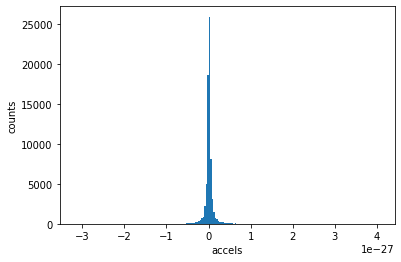

In [191]:
plt.hist(accls_vals, bins = 200)
#plt.yscale('log')
plt.ylabel('counts')
plt.xlabel('accels')
plt.show()

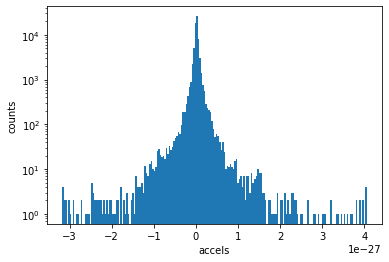

In [192]:
plt.hist(accls_vals, bins = 200)
plt.yscale('log')
plt.ylabel('counts')
plt.xlabel('accels')
plt.show()

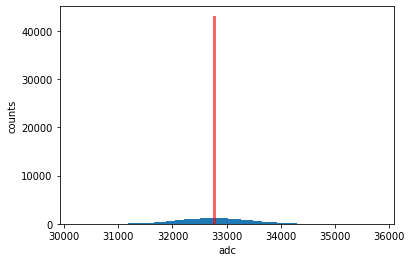

In [193]:
X_Val1 = [(65536/2)-1, (65536/2)-1]
Y_Val1 = [0, 43000]

plt.hist(reading_vals, bins = 200)
plt.plot(X_Val1, Y_Val1, 'r', alpha=0.6, linewidth = 3)
#plt.yscale('log')
plt.ylabel('counts')
plt.xlabel('adc')
plt.show()

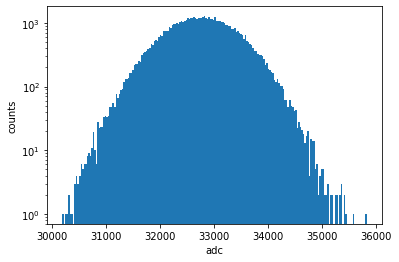

In [194]:
plt.hist(reading_vals, bins = 200)
plt.yscale('log')
plt.ylabel('counts')
plt.xlabel('adc')
plt.show()

In [195]:
positions2 = []

for sensor in DETECTOR_CHARACTERISTICS:
    positions2.append(DETECTOR_CHARACTERISTICS[sensor]['position'])

dist_actl = np.ones((len(out), len(positions2)))
accl_actl = np.ones((len(out), len(sensors)))
lim_actl_loc = np.ones((len(out), len(sensors)))
lim_actl = np.ones((len(out), len(sensors)))
out_len = len(out)
sen_len = len(sensors)

for lim1_loc in range(0, out_len):
    intr_loc_X = np.zeros((len(out), len(sensors), len(out[lim1_loc]['particle_location'])))
    intr_loc_Y = np.zeros((len(out), len(sensors), len(out[lim1_loc]['particle_location'])))
    intr_loc_Z = np.zeros((len(out), len(sensors), len(out[lim1_loc]['particle_location'])))
    intr_loc_X_accc = np.zeros((len(out), len(sensors), len(out[lim1_loc]['particle_location'])))
    intr_loc_Y_accc = np.zeros((len(out), len(sensors), len(out[lim1_loc]['particle_location'])))
    intr_loc_Z_accc = np.zeros((len(out), len(sensors), len(out[lim1_loc]['particle_location'])))
#test = [[],[],[]]

for lim1_loc in range(0, out_len):
    for lim2_loc in range(0, sen_len):
        for lim3_loc in range(0, len(out[lim1_loc]['particle_location'])):
            dist_sens_part = np.linalg.norm(positions2[lim2_loc] - out[lim1_loc]['particle_location'][lim3_loc])
            if lim3_loc == 0:
                dist_actl[lim1_loc][lim2_loc] = dist_sens_part
                lim_actl_loc[lim1_loc][lim2_loc] = lim3_loc
                intr_loc_X[lim1_loc][lim2_loc][lim3_loc-1] = 0
                intr_loc_Y[lim1_loc][lim2_loc][lim3_loc-1] = 0
                intr_loc_Z[lim1_loc][lim2_loc][lim3_loc-1] = 0
                intr_loc_X[lim1_loc][lim2_loc][lim3_loc] = out[lim1_loc]['particle_location'][lim3_loc][0]
                intr_loc_Y[lim1_loc][lim2_loc][lim3_loc] = out[lim1_loc]['particle_location'][lim3_loc][1]
                intr_loc_Z[lim1_loc][lim2_loc][lim3_loc] = out[lim1_loc]['particle_location'][lim3_loc][2]
            elif dist_sens_part < dist_actl[lim1_loc][lim2_loc]:
                dist_actl[lim1_loc][lim2_loc] = dist_sens_part
                lim_actl_loc[lim1_loc][lim2_loc] = lim3_loc
                intr_loc_X[lim1_loc][lim2_loc][lim3_loc-1] = 0
                intr_loc_Y[lim1_loc][lim2_loc][lim3_loc-1] = 0
                intr_loc_Z[lim1_loc][lim2_loc][lim3_loc-1] = 0
                intr_loc_X[lim1_loc][lim2_loc][lim3_loc] = out[lim1_loc]['particle_location'][lim3_loc][0]
                intr_loc_Y[lim1_loc][lim2_loc][lim3_loc] = out[lim1_loc]['particle_location'][lim3_loc][1]
                intr_loc_Z[lim1_loc][lim2_loc][lim3_loc] = out[lim1_loc]['particle_location'][lim3_loc][2]

for lim1_acc in range(0, out_len):
    for lim2_acc in tqdm(range(0, sen_len)):
        for lim3_acc in range(0, len(out[lim1_acc][sensors[lim2_acc]])):
            accl = np.linalg.norm(out[lim1_acc][sensors[lim2_acc]][lim3_acc])
            if lim3_acc == 0:
                accl_actl[lim1_acc][lim2_acc] = accl
                lim_actl[lim1_acc][lim2_acc] = lim3_acc
                intr_loc_X_accc[lim1_acc][lim2_acc][lim3_acc-1] = 0
                intr_loc_Y_accc[lim1_acc][lim2_loc][lim3_acc-1] = 0
                intr_loc_Z_accc[lim1_acc][lim2_loc][lim3_acc-1] = 0
                intr_loc_X_accc[lim1_acc][lim2_loc][lim3_acc] = out[lim1_acc]['particle_location'][lim3_acc][0]
                intr_loc_Y_accc[lim1_acc][lim2_loc][lim3_acc] = out[lim1_acc]['particle_location'][lim3_acc][1]
                intr_loc_Z_accc[lim1_acc][lim2_loc][lim3_acc] = out[lim1_acc]['particle_location'][lim3_acc][2]
            elif accl > accl_actl[lim1_acc][lim2_acc]:
                accl_actl[lim1_acc][lim2_acc] = accl
                lim_actl[lim1_acc][lim2_acc] = lim3_acc
                intr_loc_X_accc[lim1_acc][lim2_acc][lim3_acc-1] = 0
                intr_loc_Y_accc[lim1_acc][lim2_loc][lim3_acc-1] = 0
                intr_loc_Z_accc[lim1_acc][lim2_loc][lim3_acc-1] = 0
                intr_loc_X_accc[lim1_acc][lim2_loc][lim3_acc] = out[lim1_acc]['particle_location'][lim3_acc][0]
                intr_loc_Y_accc[lim1_acc][lim2_loc][lim3_acc] = out[lim1_acc]['particle_location'][lim3_acc][1]
                intr_loc_Z_accc[lim1_acc][lim2_loc][lim3_acc] = out[lim1_acc]['particle_location'][lim3_acc][2]


100%|██████████| 64/64 [00:00<00:00, 310.00it/s]


In [196]:
intr_loc_X[0][61]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [197]:
DETECTOR_CHARACTERISTICS[sensors[1]]['position']

array([-3, -3, -1])

In [198]:
positions2_X = np.zeros(sen_len)
positions2_Y = np.zeros(sen_len)
positions2_Z = np.zeros(sen_len)

for sens_loc in range(0, sen_len):
    positions2_X[sens_loc] = DETECTOR_CHARACTERISTICS[sensors[sens_loc]]['position'][0]
    positions2_Y[sens_loc] = DETECTOR_CHARACTERISTICS[sensors[sens_loc]]['position'][1]
    positions2_Z[sens_loc] = DETECTOR_CHARACTERISTICS[sensors[sens_loc]]['position'][2]

X_samp = np.zeros(len(out[0]['particle_location']))
Y_samp = np.zeros(len(out[0]['particle_location']))
Z_samp = np.zeros(len(out[0]['particle_location']))

for samp_dist in range(0, len(out[0]['particle_location'])):
    X_samp[samp_dist] = out[0]['particle_location'][samp_dist][0]
    Y_samp[samp_dist] = out[0]['particle_location'][samp_dist][1]
    Z_samp[samp_dist] = out[0]['particle_location'][samp_dist][2]

X = []
Y = []
Z = []

for tm_indx in range(0, len(out[0]['time'])):
    for sens_indx in range(0, sen_len):
        if intr_loc_X[0][sens_indx][tm_indx] != 0:
            if intr_loc_Y[0][sens_indx][tm_indx] == 0 and intr_loc_Z[0][sens_indx][tm_indx] == 0:
                print("Time of interaction is not uniform accross X, Y, Z locations")
            else:
                X.append(intr_loc_X[0][sens_indx][tm_indx])
                Y.append(intr_loc_Y[0][sens_indx][tm_indx])
                Z.append(intr_loc_Z[0][sens_indx][tm_indx])

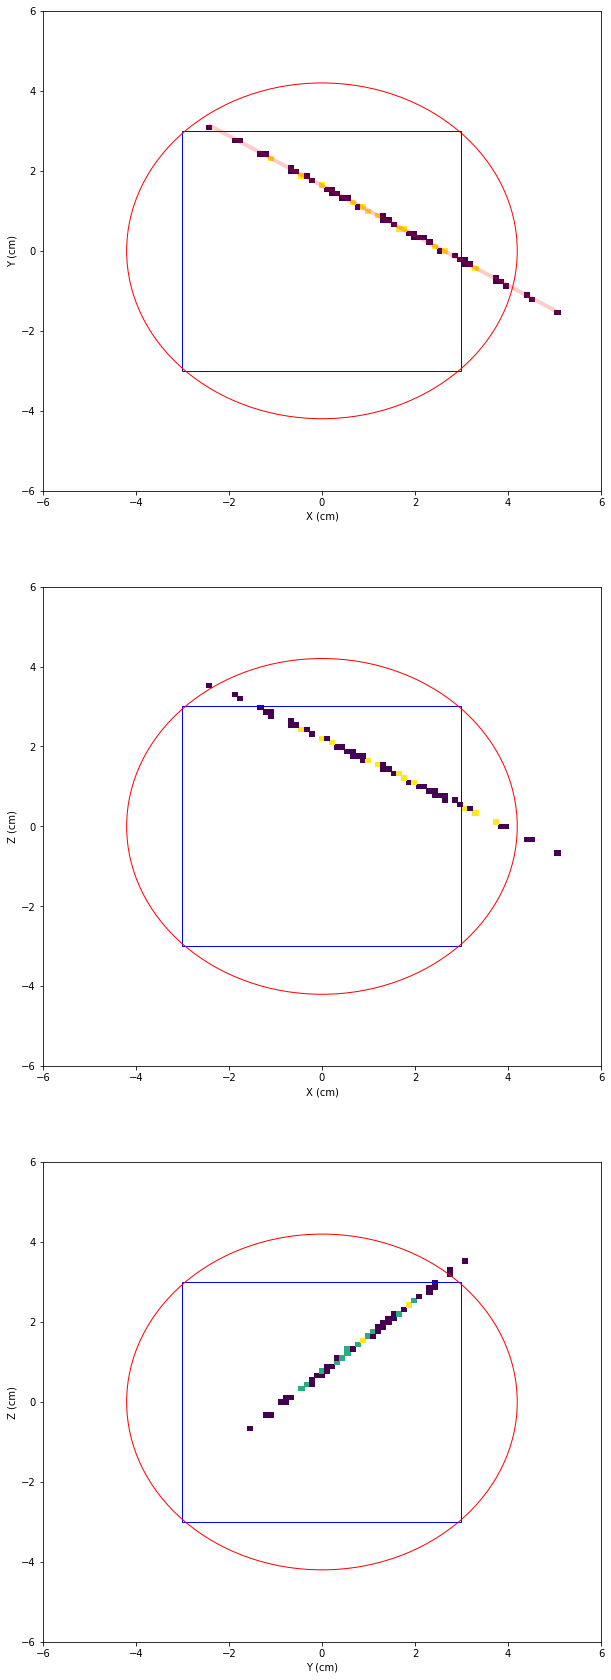

In [199]:
fig, axs = plt.subplots(3,1,figsize = [10,30])
ax = axs[0]
h1 = ax.hist2d(X,Y,bins=[np.linspace(-55,55,1000),np.linspace(-55,55,1000)],norm=clr.LogNorm())
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
#plt.ylim(0,8)
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.plot(X_samp, Y_samp, 'r', alpha=0.2, linewidth = 4)
Rect1 = plt.Rectangle((-3,-3), 6, 6, edgecolor='b', fill=False)
ax.add_artist(Rect1)
Circ1 = plt.Circle((0,0), 4.2, edgecolor='r', fill=False)
ax.add_artist(Circ1)

ax = axs[1]
h2 = ax.hist2d(X,Z,bins=[np.linspace(-55,55,1000),np.linspace(-55,55,1000)],norm=clr.LogNorm())
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_xlabel('X (cm)')
ax.set_ylabel('Z (cm)')
#ax.plot(X_samp, Z_samp, 'r', alpha=0.2, linewidth = 3)
Rect2 = plt.Rectangle((-3,-3), 6, 6, edgecolor='b', fill=False)
ax.add_artist(Rect2)
Circ2 = plt.Circle((0,0), 4.2, edgecolor='r', fill=False)
ax.add_artist(Circ2)

ax = axs[2]
h3 = ax.hist2d(Y,Z,bins=[np.linspace(-55,55,1000),np.linspace(-55,55,1000)],norm=clr.LogNorm())
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_xlabel('Y (cm)')
ax.set_ylabel('Z (cm)')
#ax.plot(Y_samp, Z_samp, 'r', alpha=0.2, linewidth = 3)
Rect3 = plt.Rectangle((-3,-3), 6, 6, edgecolor='b', fill=False)
ax.add_artist(Rect3)
Circ2 = plt.Circle((0,0), 4.2, edgecolor='r', fill=False)
ax.add_artist(Circ2)

#plt.colorbar(h3[3])

#plt.savefig('')
plt.show()

In [200]:
d=[]
for x in range(0,len(out[0][sensors[0]])):
    d.append(np.linalg.norm(out[0][sensors[50]][x]))
max(d)

2.2568947924093393e-28

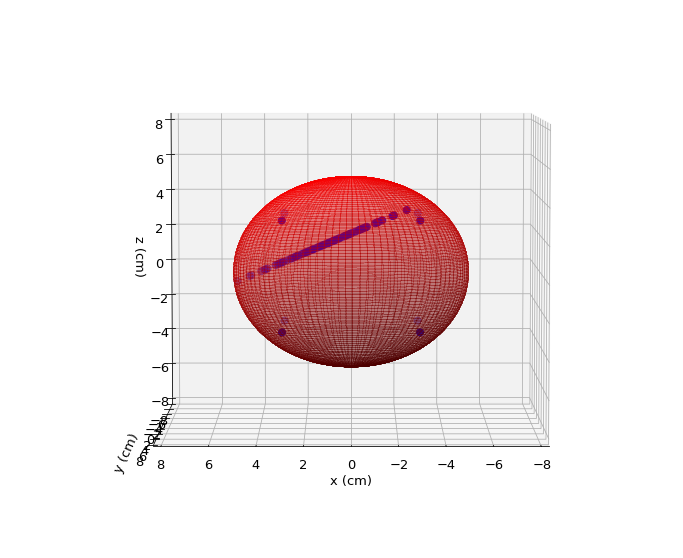

In [201]:
fig1 = plt.figure(figsize=(12,10))
ax1 = fig1.add_subplot(111, projection='3d')

ax1.clear()
positions2 = np.array(positions2)
ax1.elev = 5
ax1.azim = 90
ax1.set(xlim=[-8,8],ylim=[-8,8],zlim=[-8,8])
ax1.set_xlabel('x (cm)', fontsize=13, labelpad=10)
ax1.set_ylabel('y (cm)', fontsize=13, labelpad=10)
ax1.set_zlabel('z (cm)', fontsize=13, labelpad=10)
ax1.tick_params(labelsize=13)

scatter = ax1.scatter3D(X, Y, Z, s=50, c='b')
scatter = ax1.scatter3D([3, 3, -3, 3, 3, -3, -3, -3], [3, -3, 3, 3, -3, 3, -3, -3,], [3, 3, 3, -3, -3, -3, -3, 3], s=50, c='b')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 5.2 * np.outer(np.cos(u), np.sin(v))
y = 5.2 * np.outer(np.sin(u), np.sin(v))
z = 5.2 * np.outer(np.ones(np.size(u)), np.cos(v))
ax1.plot_surface(x, y, z, color='r', alpha=0.3, rcount = 100, ccount = 100, shade=True,antialiased=False, lightsource=LightSource(altdeg=110))
#scatter2 = ax1.scatter3D(0, 0, 0, c='r', alpha=1, s=160000)


In [213]:
strt_indx_len = randrange(0, 60)
strt_indx = np.zeros((strt_indx_len, 3))

end_indx_len = randrange(0, 60)
end_indx = np.zeros((end_indx_len, 3))

In [231]:
full_data = np.zeros((len(out[0])-2,len(strt_indx)+len(out[0][sensors[0]])+len(end_indx), 3))

for sens in range(0,len(out[0])-2):
    first_part = np.concatenate((strt_indx, out[0][sensors[sens]]))
    full_array = np.concatenate((first_part, end_indx))
    for x in range(0,len(full_array)):
        for dim in range(0,3):
            full_data[sens][x][dim] = full_array[x][dim]

In [254]:
full_data[0][7+47+370-1]

array([0., 0., 0.])

In [ ]:
# analysis_array = np.zeros(0, dtype=[('sensors', 'f4')])

# for a_naught in range(0,len(full_data[0])):
#     for a_n in tqdm(range(a_naught+1,len(full_data[0]))):
#         for sens2 in range(0,len(out[0])-2):
#             point_indx = a_naught
#             while point_indx != a_n + 1:
#                 analysis_array = np.append(analysis_array, np.array([(full_data[sens2][point_indx])], dtype=analysis_array.dtype))
                
#                 point_indx += 1